In [1]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(1807)

X_train = []
X_test = []

for filename in ["features_InceptionResNetV2.h5", "features_VGG19.h5", "features_Xception.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)              #数组拼接
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)


In [25]:
'''
import keras
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import optimizers

%matplotlib inline

#记录accuracy与loss，以便可视化

    
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x,name='Fine-tuning')
adadelta = optimizers.sgd(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)#Adadelta(lr=1e-6, rho=0.95, epsilon=None, decay=0.0)
#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer=adadelta,
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''

In [26]:
'''
log_filepath='/home/alex/prog/KaggleCat/tb'
#使用tensorboard可视化
from keras.callbacks import LearningRateScheduler, TensorBoard
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[TensorBoard(log_dir=log_filepath)])
'''

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 61us/step - loss: 0.1149 - acc: 0.9643 - val_loss: 0.0278 - val_acc: 0.9910
Epoch 2/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0460 - acc: 0.9847 - val_loss: 0.0232 - val_acc: 0.9924
Epoch 3/8
20000/20000 [==============================] - 1s 43us/step - loss: 0.0354 - acc: 0.9881 - val_loss: 0.0205 - val_acc: 0.9930
Epoch 4/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.0208 - val_acc: 0.9932
Epoch 5/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0270 - acc: 0.9919 - val_loss: 0.0186 - val_acc: 0.9938
Epoch 6/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0258 - acc: 0.9918 - val_loss: 0.0164 - val_acc: 0.9942
Epoch 7/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0181 - val_acc: 0.9936

In [22]:
'''
##sgd(lr=1e-4)时
log_filepath='/home/alex/prog/KaggleCat/tb'
#使用tensorboard可视化
from keras.callbacks import LearningRateScheduler, TensorBoard
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[TensorBoard(log_dir=log_filepath)])
'''

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 59us/step - loss: 0.2073 - acc: 0.9239 - val_loss: 0.0466 - val_acc: 0.9842
Epoch 2/8
20000/20000 [==============================] - 1s 43us/step - loss: 0.0886 - acc: 0.9668 - val_loss: 0.0395 - val_acc: 0.9870
Epoch 3/8
20000/20000 [==============================] - 1s 43us/step - loss: 0.0713 - acc: 0.9740 - val_loss: 0.0364 - val_acc: 0.9888
Epoch 4/8
20000/20000 [==============================] - 1s 43us/step - loss: 0.0599 - acc: 0.9792 - val_loss: 0.0338 - val_acc: 0.9898
Epoch 5/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0557 - acc: 0.9812 - val_loss: 0.0319 - val_acc: 0.9900
Epoch 6/8
20000/20000 [==============================] - 1s 43us/step - loss: 0.0525 - acc: 0.9821 - val_loss: 0.0301 - val_acc: 0.9910
Epoch 7/8
20000/20000 [==============================] - 1s 44us/step - loss: 0.0467 - acc: 0.9844 - val_loss: 0.0287 - val_acc: 0.9916

In [2]:
import keras
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import plot_model

%matplotlib inline

#记录accuracy与loss，以便可视化
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
        
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = LossHistory()                    # add

Using TensorFlow backend.
/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 28us/step - loss: 0.1068 - acc: 0.9634 - val_loss: 0.0194 - val_acc: 0.9948
Epoch 2/8
20000/20000 [==============================] - 0s 23us/step - loss: 0.0236 - acc: 0.9931 - val_loss: 0.0160 - val_acc: 0.9958
Epoch 3/8
20000/20000 [==============================] - 0s 23us/step - loss: 0.0182 - acc: 0.9941 - val_loss: 0.0146 - val_acc: 0.9956
Epoch 4/8
20000/20000 [==============================] - 0s 24us/step - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0161 - val_acc: 0.9946
Epoch 5/8
20000/20000 [==============================] - 0s 24us/step - loss: 0.0165 - acc: 0.9953 - val_loss: 0.0152 - val_acc: 0.9958
Epoch 6/8
20000/20000 [==============================] - 0s 24us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.0145 - val_acc: 0.9962
Epoch 7/8
20000/20000 [==============================] - 0s 25us/step - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0158 - val_acc: 0.9950

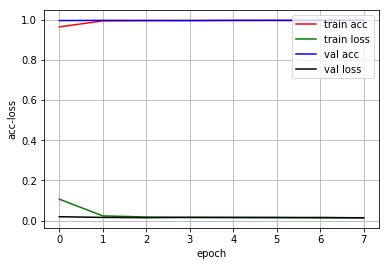

In [3]:
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[history])
history.loss_plot('epoch')

In [13]:


model.save('model.h5')

In [21]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

12500/12500 [==============================] - 0s 7us/step


In [32]:
import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("testS", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('pred003.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005


2305  12458  10643  12418  10514  7730  7907  823  2173  3927  11206  3209  4974  11702  10742  11903  

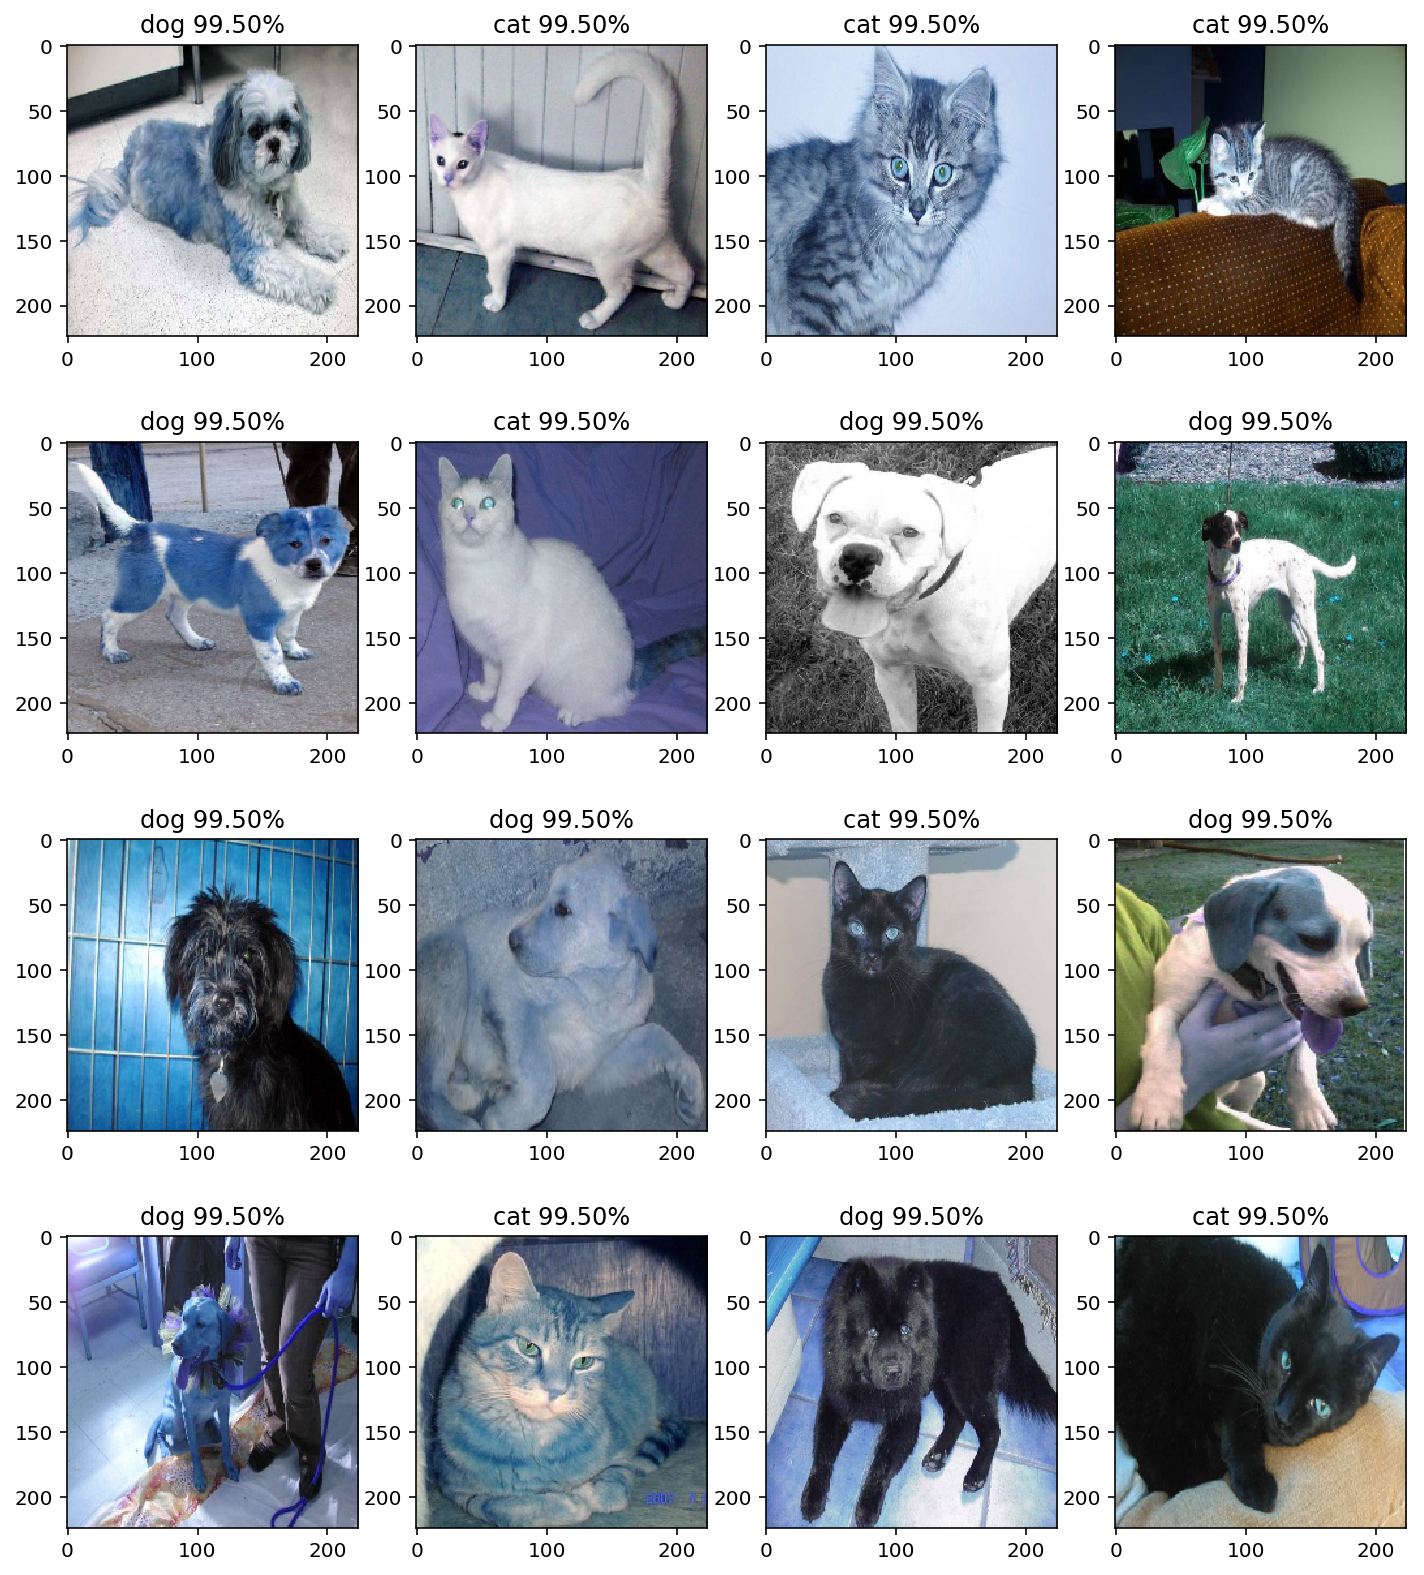

In [51]:
import pandas as pd
from keras.preprocessing.image import *
import cv2
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    num=random.randint(1, 12500)
    img = cv2.imread('test/%d.jpg' % num)
    img = cv2.resize(img, (224, 224))
    y_prob=df['label'][num-1]
    if y_prob < 0.5:
        plt.title('cat %.2f%%' % (100 - y_prob*100))
    else:
        plt.title('dog %.2f%%' % (y_prob*100))
    print(num,end='  ')
    plt.imshow(img) 


In [42]:
'''
import keras
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras import optimizers

%matplotlib inline

#记录accuracy与loss，以便可视化

    
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x,name='Fine-tuning')
adadelta = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer=adadelta,
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''              

In [43]:
'''
log_filepath='/home/alex/prog/KaggleCat/tb'
#使用tensorboard可视化
from keras.callbacks import LearningRateScheduler, TensorBoard
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[TensorBoard(log_dir=log_filepath)])
'''

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 65us/step - loss: 0.1038 - acc: 0.9655 - val_loss: 0.0196 - val_acc: 0.9944
Epoch 2/8
20000/20000 [==============================] - 1s 46us/step - loss: 0.0235 - acc: 0.9932 - val_loss: 0.0161 - val_acc: 0.9954
Epoch 3/8
20000/20000 [==============================] - 1s 46us/step - loss: 0.0175 - acc: 0.9948 - val_loss: 0.0163 - val_acc: 0.9940
Epoch 4/8
20000/20000 [==============================] - 1s 46us/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0143 - val_acc: 0.9952
Epoch 5/8
20000/20000 [==============================] - 1s 47us/step - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0176 - val_acc: 0.9948
Epoch 6/8
20000/20000 [==============================] - 1s 47us/step - loss: 0.0157 - acc: 0.9953 - val_loss: 0.0146 - val_acc: 0.9952
Epoch 7/8
20000/20000 [==============================] - 1s 47us/step - loss: 0.0124 - acc: 0.9964 - val_loss: 0.0146 - val_acc: 0.9956